# Energiegewinnung- und verbrauch Dartellung

## Energieverbrauch im verarbeitenden Gerwerbe

#### setup

In [242]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.animation import FuncAnimation
import math


In [349]:
## read in german map
kreise = gpd.read_file('1_sehr_hoch.geojson')

karte_ger = gpd.read_file("/Users/boarnold/Downloads/georef-germany-kreis@public.geojson")


In [357]:
for x in range(len(karte_ger)):
    if karte_ger.krs_code[x][0] == "03405":
        print(x)
karte_ger[73:75]
plot_dict_new["03405"]

73


{2012: 3174057,
 2011: 3173559,
 2010: 5342172,
 2009: 14703116,
 2008: 19581890,
 2007: 22392834,
 2006: 21932110,
 2005: 23977350,
 2004: 22364420,
 2003: 20518883}

In [288]:
# read in data from energy usage of the manufacturing industry
verGer = pd.read_excel("energie_verGer.xlsx")
verGer2 = pd.read_excel("industry_data_ger.xlsx")

#### list setup

In [289]:
## create lists to plot data
c = 0
c2 = 0
d = {}
no_v = []
no_g = []
for value_name in range(7,494):
    for kreis_name in range(len(kreise)):
        if type(verGer.Landkreis[value_name]) == str:
            if verGer.Landkreis[value_name].split(",")[0] == kreise.NAME_3[kreis_name]:
                #print(kreise.NAME_3[kreis_name])
                d[value_name] = kreis_name
                c += 1
            elif verGer.Landkreis[value_name].split(",")[0] == kreise.NAME_3[kreis_name].split()[0]:
                #print(kreise.NAME_3[kreis_name])
                d[value_name] = kreis_name
                c += 1
    if c == c2:       
        no_v.append(verGer.Landkreis[value_name])
    c2 = c

In [290]:
## alternative lists to plot
c = 0
c2 = 0
d = {}
#no_v = []
no_g = []

for kreis_name in range(len(kreise)):
    for value_name in range(7,494):
        if type(verGer.Landkreis[value_name]) == str:
            if verGer.Landkreis[value_name].split(",")[0] == kreise.NAME_3[kreis_name]:
                #print(kreise.NAME_3[kreis_name])
                d[value_name] = kreis_name
                c += 1
            elif verGer.Landkreis[value_name].split(",")[0] == kreise.NAME_3[kreis_name].split()[0]:
                #print(kreise.NAME_3[kreis_name])
                d[value_name] = kreis_name
                c += 1
            elif verGer.Landkreis[value_name].split("-")[:2] == kreise.NAME_3[kreis_name].split("-")[:2]:
                d[value_name] = kreis_name
                c += 1
    if c == c2:       
        no_g.append(kreise.NAME_3[kreis_name])
    c2 = c
                

In [291]:
## match map with value data
mat = SequenceMatcher(None, "test", "xxxx").find_longest_match()
col = 0
d2 = {}
d3 = {}
akk = []
for kreis_name in range(len(kreise)):
    if "Städte" in kreise.NAME_3[kreis_name]:
        kreis = kreise.NAME_3[kreis_name][:-7]
    else:
        kreis = kreise.NAME_3[kreis_name]
    for value_name in range(7,494):

        aku = SequenceMatcher(None,verGer.Landkreis[value_name].split(",")[0],kreis).find_longest_match()
        if aku[2] > mat[2]:
            akk.append(aku[2])
            col = value_name
            mat = aku
    d2[kreis_name] = col
    d3[kreise.NAME_3[kreis_name]] =verGer.Landkreis[col]
    mat = SequenceMatcher(None, "test", "xxxx").find_longest_match()

In [292]:
## lists for plots
name_value = []
name_location = []
geometry = []
value = []
for ky in d2.keys():
    name_value.append(verGer.Landkreis[d2[ky]])
    name_location.append(kreise.NAME_3[ky])
    geometry.append(kreise.geometry[ky])
    try:
        value.append(float(verGer.insgesamt[d2[ky]]))
    except ValueError:
        value.append(0)
    

In [294]:
## data for tkinter
max_l = 0
x_max = []
y_max = []
er_val = []
lk_max = ""
plot_dict = {k:([],[]) for k in name_value}
for j in range(7, len(verGer)):
    if type(verGer.Landkreis[j]) == str:
        if verGer.Landkreis[j] in plot_dict.keys():
            x, y = plot_dict[verGer.Landkreis[j]]
            try: 
                y.append(int(verGer.insgesamt[j]))
                x.append(2022-len(x))
            except ValueError:
                er_val.append(verGer.Landkreis[j])
                y.append(0)
                x.append(2022-len(x))
            if len(y) > max_l:
                max_l = len(y)
                x_max = x
                y_max = y
                lk_max = verGer.Landkreis[j]
            plot_dict[verGer.Landkreis[j]] = (x,y)

In [295]:
number_dict = {name_value[k]:k for k in range(len(name_value))}

#### updated lists

In [359]:
## lists for fot together map and data
data_dict = {}
for x in range(6,len(verGer2)):
    data_dict[verGer2.PLZ[x]] = verGer2.Landkreis[x]

## gmdsch is to match code of the Landkreis to the name; lks is inversed
gmdsch = {}
for line in range(len(karte_ger)):
    gmdsch[karte_ger.krs_code[line][0]] = karte_ger.krs_name[line][0]

lks = {value: key for key,value in gmdsch.items()}

##addapt_dict is for integrate old Landkreise 
addapt_dict = {'03152': '03159', '03156': '03159','13001':'13075', '13002':'13071','13005':'13073', '13006':'13074', '13051':'13072', '13052':'13071', '13053':'13072', '13054': '13076', '13055': '13071', '13056':'13071','13057': '13073', '13058': '13074', '13059': '13075', '13060': '13076', '13061': '13073', '13062':'13075', '05354': '05334', '14177': '14522', '14161': '14511', '14166': '14523', '14167': '14524', '14171': '14521', '14173': '14524', '14178': '14523', '14181': '14521', '14182': '14522', '14188': '14521', '14191': '14521', '14193': '14524', '14262': '14612', '14263': '14626', '14264': '14625', '14272': '14625', '14280': '14627', '14284': '14626', '14285': '14627', '14286': '14626', '14287': '14628', '14290': '14628', '14292': '14625', '14365': '14713', '14374': '14730', '14375': '14522', '14379': '14729', '14383': '14729', '14389': '14730', '15101': '15001', '15151': '15082', '15153': '15089', '15154': '15082', '15159': '15082', '15171': '15091', '15202': '15002', '15256': '15084', '15260': '15087', '15261': '15088', '15265': '15088', '15266': '15087', '15268': '15084', '15303': '15003', '15352': '15089', '15355': '15083', '15357': '15085', '15358': '15086', '15362': '15083', '15363': '15090', '15364': '15085', '15367': '15089', '15369': '15085', '15370': '15081'}

## d_new is to know the line of the Landkreis to know its geometry
d_new = {}
for kreis in range(len(verGer2)):
    if verGer2.PLZ[kreis] not in d_new:
        for line in range(len(karte_ger)):
            if verGer2.PLZ[kreis] == karte_ger.krs_code[line][0]:
                d_new[verGer2.PLZ[kreis]] = line
            elif verGer2.PLZ[kreis] in addapt_dict.keys():
                if addapt_dict[verGer2.PLZ[kreis]] == karte_ger.krs_code[line][0]:
                    d_new[verGer2.PLZ[kreis]] = line

## lists that are needed for the dataframe
name_lk = []
geo = []
val = []
val_dict = {}
for l in range(6, 546):
    if verGer2.PLZ[l] in d_new.keys():
        try:
            if d_new[verGer2.PLZ[l]] not in val_dict.keys():
                val.append(int(verGer2.insgesamt[l]))
                geo.append(karte_ger.geometry[d_new[verGer2.PLZ[l]]])
                name_lk.append(karte_ger.krs_name[d_new[verGer2.PLZ[l]]][0])
                val_dict[d_new[verGer2.PLZ[l]]] = int(verGer2.insgesamt[l])
            else:
                val_dict[d_new[verGer2.PLZ[l]]] += int(verGer2.insgesamt[l])

        except ValueError:
            pass

## to create timelines for each Landkreis
plot_dict_new = {x: ({}) for x in gmdsch.keys()}
for l in range(6, len(verGer2)):
    if len(verGer2.PLZ[l]) == 4:
        year = int(verGer2.PLZ[l])
    if len(verGer2.PLZ[l]) == 5:
        if verGer2.PLZ[l] in plot_dict_new.keys():
            lk = plot_dict_new[verGer2.PLZ[l]]
        else:
            lk = plot_dict_new[addapt_dict[verGer2.PLZ[l]]]
        try:
            if year in lk.keys():
                lk[year] += int(verGer2.insgesamt[l])
            else:
                lk[year] = int(verGer2.insgesamt[l])
        except ValueError:
            pass

number_dict_new = {list(gmdsch.values())[k]:k for k in range(len(gmdsch.values()))}

#### plot data

In [296]:
## create dataframe 
df = pd.DataFrame(
    {
        "name_value": name_value,
        "name_location": name_location,
        "value": value,
        "geometry": geometry,
    }
)

In [297]:
gdf = gdf = gpd.GeoDataFrame(
    df, geometry=geometry
)

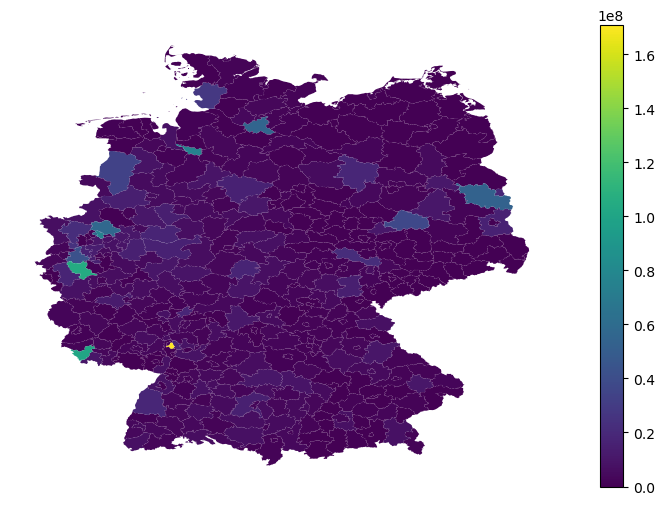

In [298]:
## plot data with geopandas
gdf.plot("value", legend=True, figsize=(12,6)).set_axis_off()
gdf.explore("value") #vmax to change color map

Text(0.5, 1.0, 'Energieverbrauch verarbeitendes Gerwerbe in Deutschland')

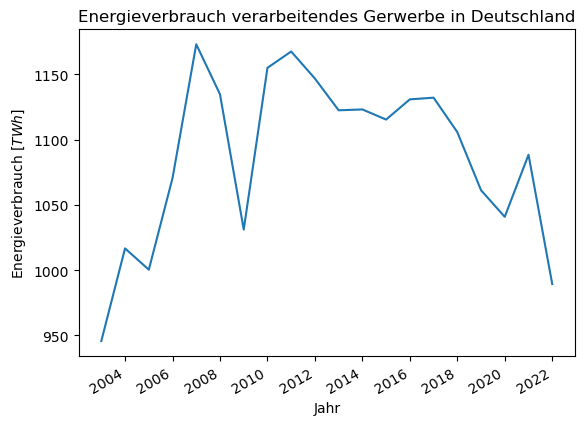

In [299]:
ger_val = {}
year = 0
for line in range(6,len(verGer2)):
    if len(verGer2.PLZ[line]) == 4:
        year = int(verGer2.PLZ[line])
    if verGer2.PLZ[line] == "DG":
        ger_val[year] = verGer2.insgesamt[line]

y_unit = [x*0.000000277777778 for x in list(ger_val.values())]
x_date = pd.to_datetime([str(x) for x in ger_val.keys()], yearfirst=True)
plt.plot(x_date,y_unit)
plt.gcf().autofmt_xdate()
plt.ylabel(r"Energieverbrauch [$TWh$]")
plt.xlabel("Jahr")
plt.title("Energieverbrauch verarbeitendes Gerwerbe in Deutschland")

#### updated plot

In [312]:
df_new = pd.DataFrame(
    {
        "name_value": name_lk,
        "value": list(val_dict.values()),
        "geometry": geo,
    }
)
gdf_new = gpd.GeoDataFrame(
    df_new, geometry=geo
)


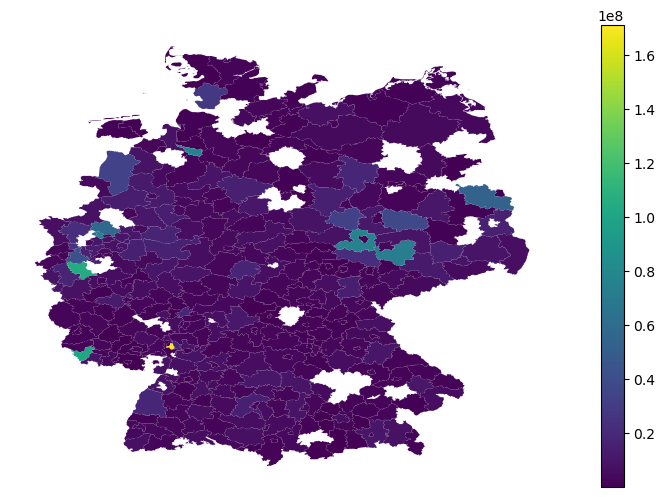

In [313]:
## plot for the year 2022
gdf_new.plot("value", legend=True, figsize=(12,6)).set_axis_off()


#### windows


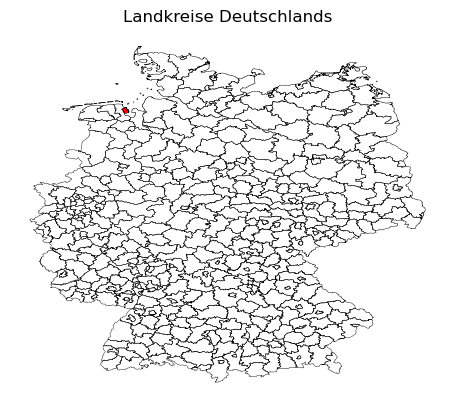

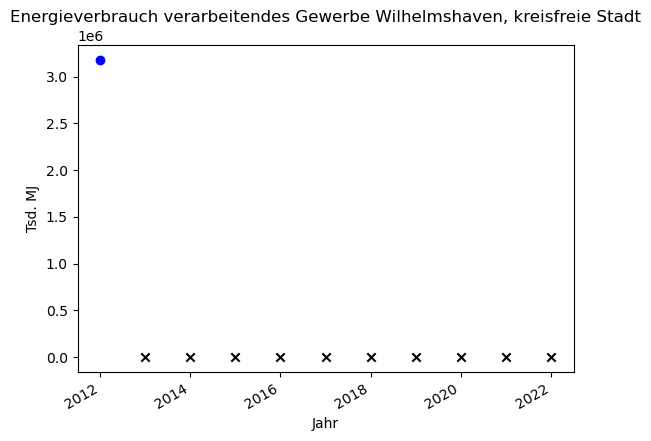

In [17]:
### show the data in a window
class MainWindow(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Main Window")
        
        ## Read GeoPandas dataframe
        self.gdf = gdf
        
        ## Create a plot on the main window
        self.figure, self.ax = plt.subplots()
        self.plot_data(self.gdf)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        ## Create a dropdown menu (combobox)
        self.options_label = ttk.Label(self, text="Select an option:")
        self.options_label.pack(pady=(10, 0))
        
        self.selected_option = tk.StringVar()
        self.options_combobox = ttk.Combobox(self, textvariable=self.selected_option)
        self.options_combobox['values'] = name_value
        self.options_combobox.bind("<<ComboboxSelected>>", self.update_plot)
        self.options_combobox.pack(pady=(0, 10))
    ## plot the startwindow    
    def plot_data(self, gdf):
        gdf.boundary.plot(ax=self.ax, color="k", linewidth=0.3).set_axis_off()
        self.ax.set_title('Landkreise Deutschlands')

    def plot_one(self,gdf, ax, option):
        gdf.boundary.plot(ax=ax, color="k", linewidth=0.3).set_axis_off()
        gdf[number_dict[option]:number_dict[option]+1].plot(ax=ax, color="r").set_axis_off()
        self.ax.set_title('Landkreise Deutschlands')

    def update_plot(self, event=None):
        ## Get selected option
        option = self.selected_option.get()
         ## Clear previous plot on the main window
        self.ax.clear()
        self.plot_one(self.gdf, self.ax,option)

        ## Create a new window for the plot
        new_plot_window = tk.Toplevel(self)
        
        ## Create a plot in the new window
        figure, ax = plt.subplots()
        (x,y) = plot_dict[option]
        for ye in range(len(x)):
            x[ye] = pd.to_datetime(str(x[ye]))
        for year in range(len(x)):
            if y[year] == 0:
                ax.scatter(x[year], y[year], marker="x", color="k")
            else:
                ax.scatter(x[year], y[year], marker="o", color="b")
        plt.gcf().autofmt_xdate()

        ax.set_ylabel("Tsd. MJ")
        ax.set_xlabel("Jahr")
        ax.set_title(f"Energieverbrauch verarbeitendes Gewerbe {option}")
        
        ## Embed the plot into the new window
        canvas = FigureCanvasTkAgg(figure, master=new_plot_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Redraw the plot
        self.canvas.draw()

def main():
    app = MainWindow()
    app.mainloop()

if __name__ == "__main__":
    main()


#### updated window

In [ ]:
### show the data in a window
class MainWindow(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Main Window")
        
        ## Read GeoPandas dataframe
        self.gdf = gdf_new
        
        ## Create a plot on the main window
        self.figure, self.ax = plt.subplots()
        self.plot_data(self.gdf)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        ## Create a dropdown menu (combobox)
        self.options_label = ttk.Label(self, text="Select an option:")
        self.options_label.pack(pady=(10, 0))
        
        self.selected_option = tk.StringVar()
        self.options_combobox = ttk.Combobox(self, textvariable=self.selected_option)
        self.options_combobox['values'] = list(gmdsch.values())
        self.options_combobox.bind("<<ComboboxSelected>>", self.update_plot)
        self.options_combobox.pack(pady=(0, 10))

    ## plot the startwindow    
    def plot_data(self, gdf):
        karte_ger.boundary.plot(ax=self.ax, color="k", linewidth=0.3).set_axis_off()
        self.ax.set_title('Landkreise Deutschlands')

    def plot_one(self,gdf, ax, option):
        karte_ger.boundary.plot(ax=ax, color="k", linewidth=0.3).set_axis_off()
        karte_ger[number_dict_new[option]:number_dict_new[option]+1].plot(ax=ax, color="r").set_axis_off()
        self.ax.set_title('Landkreise Deutschlands')

    def update_plot(self, event=None):
        ## Get selected option
        option = self.selected_option.get()
         ## Clear previous plot on the main window
        self.ax.clear()
        self.plot_one(self.gdf, self.ax,option)

        ## Create a new window for the plot
        new_plot_window = tk.Toplevel(self)
        
        ## Create a plot in the new window
        figure, ax = plt.subplots()
        lk_dict = plot_dict_new[lks[option]]
        x = list(lk_dict.keys())
        y = list(lk_dict.values())
        for ye in range(len(x)):
            x[ye] = pd.to_datetime(str(x[ye]))
        y_unit = [x*0.000277777778 for x in y]
        ax.scatter(x, y_unit, marker="o", color="b")
        for year in range(2003,2022,1):
            year = pd.to_datetime(str(year))
            if year not in x:
                ax.vlines([year], ymin=min(y_unit),ymax=max(y_unit), linewidth=16, alpha= 0.5, color = "r")

        plt.gcf().autofmt_xdate()

        ax.set_ylabel(r"$GWh$")
        ax.set_xlabel("Jahr")
        ax.set_title(f"Energieverbrauch verarbeitendes Gewerbe {option}")
        
        ## Embed the plot into the new window
        canvas = FigureCanvasTkAgg(figure, master=new_plot_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Redraw the plot
        self.canvas.draw()

def main():
    app = MainWindow()
    app.mainloop()

if __name__ == "__main__":
    main()


## Marktstammdaten

##### daten

In [34]:
## read the markstammdaten 
sheet1 = pd.read_csv("Stromerzeuger_1_bis_1000000.csv", sep=";")
sheet2 = pd.read_csv("Stromerzeuger_1000001_bis_2000000.csv", sep=";")
sheet3 = pd.read_csv("Stromerzeuger_2000001_bis_3000000.csv", sep=";")
sheet4 = pd.read_csv("Stromerzeuger_3000001_bis_4000000.csv", sep=";")
sheet5 = pd.read_csv("Stromerzeuger_4000001_bis_5000000.csv", sep=";")
sheet6 = pd.read_csv("Stromerzeuger_5000001_bis_5319380.csv", sep=";")

sheet = pd.read_csv("Stromerzeugung_all.csv", sep=";", low_memory=False)

/var/folders/s_/_81pp_h546q9w04t54lch05w0000gn/T/ipykernel_7946/3196437221.py:2: DtypeWarning: Columns (9,21,22,31) have mixed types. Specify dtype option on import or set low_memory=False.
  sheet1 = pd.read_csv("Stromerzeuger_1_bis_1000000.csv", sep=";")
/var/folders/s_/_81pp_h546q9w04t54lch05w0000gn/T/ipykernel_7946/3196437221.py:3: DtypeWarning: Columns (21,31,45) have mixed types. Specify dtype option on import or set low_memory=False.
  sheet2 = pd.read_csv("Stromerzeuger_1000001_bis_2000000.csv", sep=";")
/var/folders/s_/_81pp_h546q9w04t54lch05w0000gn/T/ipykernel_7946/3196437221.py:4: DtypeWarning: Columns (9,13,20,21,22,23,24,35,45) have mixed types. Specify dtype option on import or set low_memory=False.
  sheet3 = pd.read_csv("Stromerzeuger_2000001_bis_3000000.csv", sep=";")
/var/folders/s_/_81pp_h546q9w04t54lch05w0000gn/T/ipykernel_7946/3196437221.py:5: DtypeWarning: Columns (12,20,21,22,23,24,25,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_mem

In [ ]:
## read in the strom- and gaspreis
strom_preis = pd.read_csv('result_snow_electricity.csv',sep=',')
strom_preis['date_pd'] = pd.to_datetime(strom_preis.DATE)

gas_preis = pd.read_csv('result_snow_gas.csv', sep=',')
gas_preis['date_pd'] = pd.to_datetime(gas_preis.DATE)

#### analyse

In [36]:
## create lists to visualize
lk_leistung = {lk:([],[],[]) for lk in lks.keys()}
enrgieart = {lk:([],[],[]) for lk in lks.keys()}
for sh in [sheet1,sheet2,sheet3,sheet4,sheet5,sheet6]:

    for line in range(len(sh)):
        try:
            if type(sh.Nettonennleistung_der_Einheit[line]) == str:
                if str(sh.Gemeindeschlüssel[line])[0] == "1":
                    datum , leistung, indices = lk_leistung[gmdsch[str(sh.Gemeindeschlüssel[line])[:5]]] 

                else:
                    datum, leistung, indices = lk_leistung[gmdsch['0' + str(sh.Gemeindeschlüssel[line])[:4]]]
                if type(sh.Inbetriebnahmedatum_der_Einheit[line]) == str:
                    datum.append(sh.Inbetriebnahmedatum_der_Einheit[line])
                    leistung.append(float(str(sh.Nettonennleistung_der_Einheit[line]).replace(",",".")))
                    indices.append(line)
        except KeyError:
            pass


In [ ]:
## analyse the data for specific plot sof the energysource
energietraeger = []
for x in range(len(sheet)):
    if sheet.Energietraeger[x] not in energietraeger:
        energietraeger.append(sheet.Energieträger[x])

leistung_ger = []
datum_ger = []
for x in range(len(sheet)):
    if sheet.Betriebsstatus[x] == 'In Betrieb':
        if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == str:
            datum_ger.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
        elif np.isnan(sheet.Inbetriebnahmedatum_der_Einheit[x]):
            datum_ger.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
        leistung_ger.append(float(sheet.Nettonennleistung_der_Einheit[x].replace('.', '').replace(',','.')))

et = {x:([],[]) for x in energietraeger}
#for sheet in [sheet1,sheet2,sheet3,sheet4,sheet5,sheet6]:
for x in range(len(sheet)):
    if sheet.Betriebsstatus[x] != 'In Planung':
        if type(sheet['Gemeindeschlüssel'][x]) == str:
            datum, leistung = et[sheet.Energieträger[x]]
            if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == str:
                datum.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
            elif np.isnan(sheet.Inbetriebnahmedatum_der_Einheit[x]):
                datum.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
            leistung.append(float(sheet.Nettonennleistung_der_Einheit[x].replace('.', '').replace(',','.')))

loc_et = {x:{} for x in gmdsch.keys()}
for x in loc_et.keys():
    loc_et[x] = {y:([],[]) for y in energietraeger[:-1]}
c = 0
c2 = 0
for x in range(len(sheet)):
    try:
        gs = sheet.Gemeindeschlüssel[x][:5]  if sheet.Gemeindeschlüssel[x][0] == '1' and sheet.Gemeindeschlüssel[x][1] != '0' else  '0' + sheet.Gemeindeschlüssel[x][:4]
        if sheet.Betriebsstatus[x] != 'In Planung':
            datum, leistung = loc_et[gs][sheet.Energieträger[x]]
            if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == str:
                datum.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
            elif np.isnan(sheet.Inbetriebnahmedatum_der_Einheit[x]):
                datum.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
            leistung.append(float(sheet.Nettonennleistung_der_Einheit[x].replace(',', '.')))
    except KeyError:
        c +=1
    except TypeError:
        c2 += 1

print(c)
print(c2)

In [ ]:
## dict like above but involves the closure of power staions
et3 = {x:([],[]) for x in energietraeger}

for x in range(len(sheet)):
    if sheet.Betriebsstatus[x] == 'In Betrieb':
        if type(sheet['Gemeindeschlüssel'][x]) == str:
            datum, leistung = et3[sheet.Energieträger[x]]
            if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == str:
                datum.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
            elif np.isnan(sheet.Inbetriebnahmedatum_der_Einheit[x]):
                datum.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
            leistung.append(float(sheet.Nettonennleistung_der_Einheit[x].replace('.', '').replace(',','.'))/1000)
    elif sheet.Betriebsstatus[x] == 'Endgültig stillgelegt':
        if sheet['Datum_der_endgültigen_Stilllegung'][x] != '31.12.9999':
             if type(sheet['Gemeindeschlüssel'][x]) == str:
                datum, leistung = et3[sheet.Energieträger[x]]
                if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == str:
                    datum.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
                elif np.isnan(sheet.Inbetriebnahmedatum_der_Einheit[x]):
                    datum.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
                leistung.append(float(sheet.Nettonennleistung_der_Einheit[x].replace('.', '').replace(',','.')))
                datum.append(sheet['Datum_der_endgültigen_Stilllegung'][x])
                leistung.append((float(sheet.Nettonennleistung_der_Einheit[x].replace('.', '').replace(',','.'))*(-1))/1000)

#### plot

In [21]:
## create lists for plotting
name_kreis = []
geometry_kreis = []
value_production = []
for st in range(len(lk_leistung.keys())):
    name_kreis.append(list(lk_leistung.keys())[st])
    datum, leistung, indices = lk_leistung[list(lk_leistung.keys())[st]]
    value_production.append(sum(leistung))
    geometry_kreis.append(karte_ger.geometry[st])
    
    

In [22]:
## create dataframe to plot
df2 = pd.DataFrame(
    {
        "name_kreis": name_kreis,
        "value": value_production,
        "geometry": geometry_kreis,
    }
)
gdf2 = gpd.GeoDataFrame(
    df2, geometry=geometry_kreis
)

In [ ]:
# plot values
gdf2.explore("value")

#### specific plot

In [ ]:
## create plots for each energy source
for e in energietraeger:
    ## import data for created dict
    data = et[e]
    x_data = pd.to_datetime(data[0], dayfirst=True)
    y_data = data[1]

    ## create a DataFrame for the calculations
    df_all = pd.DataFrame({'dates': x_data, 'values': y_data})
    df_grouped_all = df_all.groupby('dates')['values'].agg(['sum', 'count']).reset_index()

    ## Sort the grouped DataFrame by dates
    df_grouped_all = df_grouped_all.sort_values(by='dates')

    ## Calculate the cumulative sum of values
    df_grouped_all['cumulative_sum'] = df_grouped_all['sum'].cumsum()

    ## Calculate the cumulative sum of values and cumulative count
    df_grouped_all['cumulative_count'] = df_grouped_all['count'].cumsum()

    ## Calculate the average of all values before each date and divide it by the total count till that date
    df_grouped_all['avg_value_before'] = df_grouped_all['cumulative_sum'] / df_grouped_all['cumulative_count']

    ## Calculate the derivative (difference) of the cumulative sum
    df_grouped_all['derivative'] = df_grouped_all['cumulative_sum'].diff()

    ## Add a column for average value per date
    df_grouped_all['avg_value'] = df_grouped_all['sum'] / df_grouped_all['count']

    ## Rename the 'count' column to 'num_values'
    df_grouped_all = df_grouped_all.rename(columns={'count': 'num_values'})

    ## Plot the data in one plot
    fig, ax = plt.subplots(5,1, sharex=True, figsize=(12,8))
    ax[0].set_title(e)
    ax[2].plot(df_grouped_all['dates'].tolist(),df_grouped_all['avg_value'].tolist(), label=r"$\varnothing$ Leistung neuer Einheiten")
    ax[2].legend()
    ax[2].set_ylabel(r'$\varnothing$ $kW$/ Einheit')
    ax[1].plot(df_grouped_all['dates'].tolist(), df_grouped_all['sum'].tolist(), label="neu instalierte Leistung")
    ax[1].legend()
    ax[1].set_ylabel(r'$kW$')
    ax[0].plot(df_grouped_all['dates'].tolist(), df_grouped_all['num_values'].tolist(), label="neue Anlagen")
    ax[0].legend()
    ax[0].set_ylabel('Anzahl')
    ax[0].set_xlim(pd.to_datetime('1.1.2021', dayfirst=True),pd.to_datetime('1.4.2024', dayfirst=True))
    ax[3].plot(df_grouped_all['dates'].tolist(),df_grouped_all['avg_value_before'].tolist(), label=rf'$\varnothing$ Leistung aller Einheiten')
    ax[3].set_ylabel(rf'$\varnothing$ $kW$/ Einheit')
    if e == 'Erdgas':
        ax[3].set_ylim(0,1000)
    elif e == 'Speicher':
        ax[3].set_ylim(0,100)
    ax[3].legend()
    if e in ['andere Gase' ,'Erdgas', 'Grubengas', 'Wasserstoff']:
        ax[4].plot(gas_preis['date_pd'].tolist(),gas_preis['WEIGHTED_AVG_IN_EURO'].tolist(), label= 'Gaspreis pro kWh')
        ax[4].set_ylabel('€')
        ax[4].legend()
    else:
        ax[4].plot(strom_preis['date_pd'].tolist(),strom_preis['WEIGHTED_AVG_IN_EURO'].tolist(), label= 'Strompreis pro kWh')
        ax[4].set_ylabel('€')
        ax[4].legend()
    plt.gcf().autofmt_xdate()
    plt.savefig(f'plot_{e.replace(' ', '_')}')
    plt.close(fig)


In [ ]:
## create the plot from above for each Landkreis
for key in loc_et.keys():
    ## get the data for the Landkreis
    l_et = loc_et[key]
    for e in energietraeger[:1]:
        ## the following is the same from the cell above
        data = l_et[e]
        x_data = pd.to_datetime(data[0], dayfirst=True)
        y_data = data[1]

        df_all = pd.DataFrame({'dates': x_data, 'values': y_data})
        df_grouped_all = df_all.groupby('dates')['values'].agg(['sum', 'count']).reset_index()

        df_grouped_all = df_grouped_all.sort_values(by='dates')

        df_grouped_all['cumulative_sum'] = df_grouped_all['sum'].cumsum()

        df_grouped_all['cumulative_count'] = df_grouped_all['count'].cumsum()

        df_grouped_all['avg_value_before'] = df_grouped_all['cumulative_sum'] / df_grouped_all['cumulative_count']

        df_grouped_all['derivative'] = df_grouped_all['cumulative_sum'].diff()

        df_grouped_all['avg_value'] = df_grouped_all['sum'] / df_grouped_all['count']

        df_grouped_all = df_grouped_all.rename(columns={'count': 'num_values'})

        fig, ax = plt.subplots(5,1, sharex=True, figsize=(12,8))
        ax[0].set_title(f'{e}; {gmdsch[key]}')
        ax[2].plot(df_grouped_all['dates'].tolist(),df_grouped_all['avg_value'].tolist(), label=r"$\varnothing$ Leistung ")
        ax[2].legend()
        ax[2].set_ylabel(r'$\varnothing$ $kW$/ Einheit')
        ax[1].plot(df_grouped_all['dates'].tolist(), df_grouped_all['sum'].tolist(), label="neu instalierte Leistung")
        ax[1].legend()
        ax[1].set_ylabel(r'$kW$')
        ax[0].plot(df_grouped_all['dates'].tolist(), df_grouped_all['num_values'].tolist(), label="neue Anlagen")
        ax[0].legend()
        ax[0].set_ylabel('Anzahl')
        ax[0].set_xlim(pd.to_datetime('1.1.2021', dayfirst=True),pd.to_datetime('1.4.2024', dayfirst=True))
        ax[3].plot(df_grouped_all['dates'].tolist(),df_grouped_all['avg_value_before'].tolist(), label=r'$\varnothing$ W einer Einheit')
        ax[3].legend()
        ax[3].set_ylabel(r'$\varnothing$ $kW$/ Einheit')
        ax[4].plot(strom_preis['date_pd'].tolist(),strom_preis['WEIGHTED_AVG_IN_EURO'].tolist(), label= 'Strompreis pro kWh')
        ax[4].set_ylabel('€')
        ax[4].legend()
        plt.gcf().autofmt_xdate()
        plt.savefig(f"solar_plot_kreis_{gmdsch[key].replace(' ', '_')}.png", dpi=300)
        plt.close(fig)

In [ ]:
## the following is for creating a plot for all germany with the installed net rated power
## create dataframe
data = et3[energietraeger[0]]
x_data = pd.to_datetime(data[0], dayfirst=True)
y_data = data[1]
df_all = pd.DataFrame({'dates': x_data,'values': y_data})
df_all = df_all.sort_values(by='dates', ignore_index=True)
df_all = df_all.groupby('dates')['values'].sum().reset_index()
df_all['values'] = df_all['values'].cumsum()
ty = [energietraeger[0].replace(" ", "_") for x in range(len(df_all))]
df_all['type'] = ty
for e in energietraeger[1:]:
    # get the data for every ernergy source and put it in one dict
    data = et3[e]
    x_data = pd.to_datetime(data[0], dayfirst=True)
    y_data = data[1]
    df_inter = pd.DataFrame({'dates': x_data,'values':y_data})
    df_inter = df_inter.sort_values(by='dates', ignore_index=True)
    df_inter = df_inter.groupby(f'dates')[f'values'].sum().reset_index()
    df_inter['values'] = df_inter['values'].cumsum()
    ty = [e.replace(" ", "_") for x in range(len(df_inter))]
    df_inter['type'] = ty
    df_all = pd.concat([df_all, df_inter])

df_all = df_all.sort_values(by='dates', ignore_index=True)

## make the data plotable
dates = df_all['dates'].tolist()
tx = 0
add = 0
c = 0
inter_gemein = {e.replace(" ", "_"):0 for e in energietraeger}
gemeinsam = {e.replace(" ", "_"):[] for e in energietraeger}
for x in range(len(df_all)):
    inter_gemein[df_all['type'][x]] = df_all['values'][x]
    for y in gemeinsam.keys():
        c += 1
        t = gemeinsam[y]
        for m in energietraeger[:c]:
            tx += inter_gemein[m.replace(" ", "_")]

        t.append(tx)
        tx = 0
    c = 0

In [ ]:
## define coulors for every energy source
energy_sources = {
    'Solare Strahlungsenergie': 'gold',
    'Speicher': 'deepskyblue',
    'Biomasse': 'forestgreen',
    'Erdgas': 'orangered',
    'Wind': 'lightseagreen',
    'Mineralölprodukte': 'darkorange',
    'Wasser': 'lightsteelblue',
    'Steinkohle': 'dimgray',
    'andere Gase': 'mediumorchid',
    'nicht biogener Abfall': 'saddlebrown',
    'Braunkohle': 'sienna',
    'Wärme': 'hotpink',
    'Grubengas': 'dimgrey',
    'Klärschlamm': 'olive',
    'Geothermie': 'limegreen',
    'Druck aus Wasserleitungen': 'royalblue',
    'Druck aus Gasleitungen': 'firebrick',
    'Solarthermie': 'darkorange',
    'Kernenergie': 'indigo',
    'Wasserstoff': 'silver',
    'Energieträger': 'khaki'
}
## plot the data
plt.figure(figsize=(12,8))
e_o = energietraeger[0]
plt.fill_between(dates, gemeinsam[e_o.replace(" ", "_")], color='b', label= e_o)
for e in energietraeger[1:-1]:
    plt.fill_between(dates,gemeinsam[e.replace(" ", "_")], gemeinsam[e_o.replace(" ", "_")], color=energy_sources[e], label= e)
    e_o = e
plt.legend(loc='upper left')
plt.ylabel('MW')
plt.gcf().autofmt_xdate()

plt.xlim(pd.to_datetime('1.1.2021', dayfirst=True),pd.to_datetime('1.4.2024', dayfirst=True))
#plt.savefig('all_sources_2021.png', dpi = 300)

##### gif plot

In [ ]:
# create lists with the relevant data
date = []
energietrae = []
watt = []
gs = []
for x in range(len(sheet)):
    if sheet.Betriebsstatus[x] == 'In Betrieb':
        try:
            watt.append(float(sheet.Nettonennleistung_der_Einheit[x].replace(',', '.')))
            if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == float:
                date.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
            else:
                date.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
            energietrae.append(sheet.Energieträger[x])
            if str(sheet.Gemeindeschlüssel[x])[0] in ['1'] and str(sheet.Gemeindeschlüssel[x])[1] not in ['0']:
                gs.append(str(sheet.Gemeindeschlüssel[x])[:5])
            else:
                gs.append('0' + str(sheet.Gemeindeschlüssel[x])[:4])

        except AttributeError:
            watt.append(float(sheet.Nettonennleistung_der_Einheit[x]))
            if type(sheet.Inbetriebnahmedatum_der_Einheit[x]) == float:
                date.append(sheet.Inbetriebnahmedatum_der_EEG_Anlage[x])
            else:
                date.append(sheet.Inbetriebnahmedatum_der_Einheit[x])
            energietrae.append(sheet.Energieträger[x])
            if str(sheet.Gemeindeschlüssel[x])[0] in ['1'] and str(sheet.Gemeindeschlüssel[x])[1] not in ['0']:
                gs.append(str(sheet.Gemeindeschlüssel[x])[:5])
            else:
                gs.append('0' + str(sheet.Gemeindeschlüssel[x])[:4])
        except ValueError:
            pass

## create a dataframe with the relevant data
df_ani = pd.DataFrame({
    'datum': date,
    'energietraeger': energietrae,
    'leistung': watt,
    'gemeindeschluessel': gs

})

df_ani = df_ani.sort_values('datum', ignore_index=True)

In [ ]:
## function that creates the plots for the gif
def create_df(date):
    specific_date = pd.to_datetime(date)
    df_ani_till = df_ani[df_ani['datum'] <= specific_date]
    dx = {x:(0,0) for x in gmdsch.keys()}

    for x in range(len(df_ani_till)):
        try:
            y, z = dx[df_ani_till['gemeindeschluessel'][x]]
            y += df_ani_till['leistung'][x]
            z += 1
            dx[df_ani_till['gemeindeschluessel'][x]] = y, z
        except KeyError:
            pass

    ave_list = []
    geometry_ave = []
    c = 0
    for x in dx.keys():
        if dx[x][0] == 0:
            ave_list.append(0)
        else:
            ave_list.append(dx[x][0]/dx[x][1])
        geometry_ave.append(karte_ger.geometry[c])
        c += 1


    df_zwi = pd.DataFrame({'key': list(dx.keys()), 'ave': ave_list, 'geometry': geometry_ave})

    df_zwi_geo = gpd.GeoDataFrame(df_zwi, geometry='geometry')
    return df_zwi_geo


In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots()
df_zwi_geo = create_df('1950-01-01')
# Initial plot of the geodata
geoshow = df_zwi_geo.plot('ave', legend=True, vmax= 500, vmin = 0,figsize=(12,8), ax=ax).set_axis_off()
fig.suptitle('Durschnitliche Leistung einer Einheit in Watt 1950')
date_list = [f'{x}-01-01' for x in range(1951,2025)]

# Function to update the animation frame
def animate(frame_number):
    df_zwi_geo = create_df(date_list[frame_number])

    fig.suptitle(f'Durschnitliche Leistung einer Einheit in Watt {date_list[frame_number][:4]}')
    return df_zwi_geo.plot('ave', vmax= 500, vmin = 0,figsize=(12,8), ax=ax).set_axis_off()

# Create the animation
ani = FuncAnimation(fig, animate, frames=74)

ani.save('changing_map.gif', writer='pillow', fps=2)

#### window programm

In [25]:
## setup for window
numbering = {name_kreis[k]:k for k in range(len(name_kreis))}

andere Gase
Grubengas
Klärschlamm
Klärschlamm
andere Gase
Klärschlamm
andere Gase
andere Gase
Wärme
Wärme
andere Gase
andere Gase
andere Gase
andere Gase
Grubengas
Steinkohle
andere Gase
andere Gase
Grubengas
Grubengas
Grubengas
Grubengas
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
Wärme
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
Wärme
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
Klärschlamm
Klärschlamm
andere Gase
andere Gase
Klärschlamm
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase
andere Gase


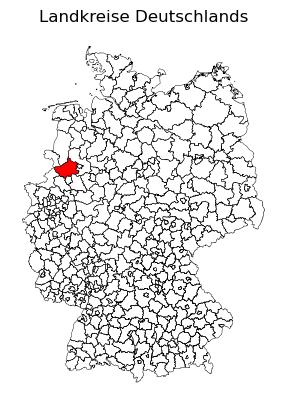

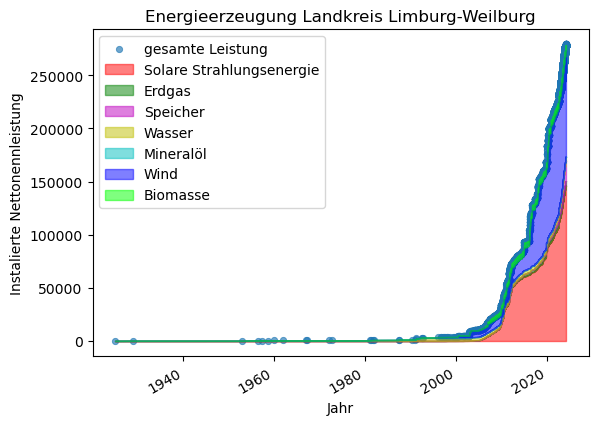

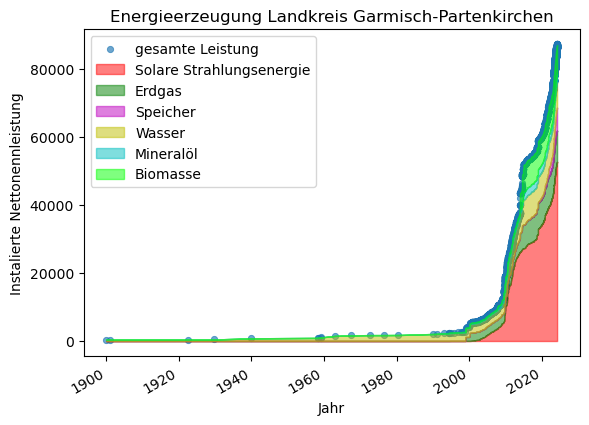

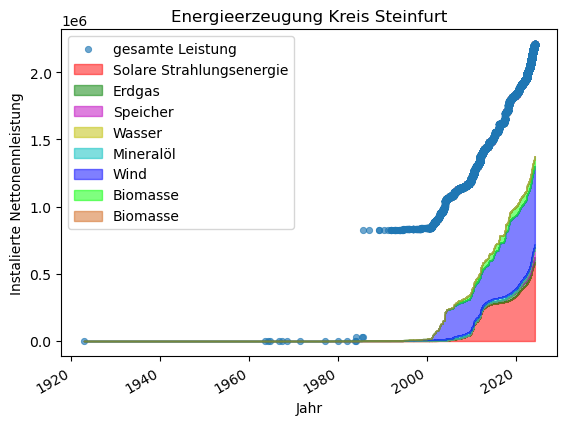

In [31]:
## create window for visualization
class MainWindow(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Main Window")
        
        ## Read GeoPandas dataframe
        self.gdf = karte_ger
        
        ## Create a plot on the main window
        self.figure, self.ax = plt.subplots()
        self.plot_data(self.gdf)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        ## Create a dropdown menu (combobox)
        self.options_label = ttk.Label(self, text="Select an option:")
        self.options_label.pack(pady=(10, 0))

        self.selected_option = tk.StringVar()
        self.options_combobox = ttk.Combobox(self, textvariable=self.selected_option)
        self.options_combobox['values'] = name_kreis
        self.options_combobox.bind("<<ComboboxSelected>>", self.update_plot)
        self.options_combobox.pack(pady=(0, 10))

        ## Create a dropdown menu (combobox)
        self.options_label = ttk.Label(self, text="specify the diagram:")
        self.options_label.pack(pady=(10, 0))

        self.selected_option_sp  = tk.StringVar(value='Standart')
        self.options_combobox = ttk.Combobox(self, textvariable=self.selected_option_sp)
        self.options_combobox['values'] = ["Standart", "Art der Erzeugung", "Spannungsart"]
        self.options_combobox.bind("<<ComboboxSelected>>")
        self.options_combobox.pack(pady=(0, 10))
        



    ## plot start window
    def plot_data(self, gdf):
        karte_ger.boundary.plot(ax=self.ax, color="k", linewidth=0.3).set_axis_off()
        self.ax.set_title('Landkreise Deutschlands')

    ## plot selected district
    def plot_one(self,gdf, ax, option):
        karte_ger.boundary.plot(ax=ax, color="k", linewidth=0.3).set_axis_off()
        karte_ger[numbering[option]:numbering[option]+1].plot(ax=ax, color="r").set_axis_off()
        self.ax.set_title('Landkreise Deutschlands')

    def update_plot(self, event=None):
        ## Get selected option
        option = self.selected_option.get()
        option2 = self.selected_option_sp.get()
         ## Clear previous plot on the main window
        self.ax.clear()
        self.plot_one(self.gdf, self.ax,option)

        ## Create a new window for the plot
        new_plot_window = tk.Toplevel(self)
        
        ## Create a plot in the new window
        figure, ax = plt.subplots()
        datum, leistung, indices = lk_leistung[option]
        datum = [pd.to_datetime(d, dayfirst=True) for d in datum]
        t = list(zip(datum, leistung, indices))
        t.sort()
        datum, leistung, indices= list(zip(*t))
        leistung2 = [sum(leistung[:n+1]) for n in range(len(leistung))]
        ax.scatter(datum, leistung2, alpha=0.65,linewidths=0.7, s=20, label="gesamte Leistung")
        ## options for selected plot, still not all energy sources noted
        if option2 == "Art der Erzeugung":
            solar = []
            so = 0
            erdgas = []
            eg = 0
            s = 0
            speicher = []
            w = 0
            wasser = []
            moe = 0
            mineraloel = []
            wi = 0
            wind = []
            bm = 0
            biomasse = []
            bk = 0
            braunkohle = []
            value_dict = {"solar": 0, "erdgas": 0, "speicher": 0, "wasser": 0, "mineraloel": 0, "wind":0, "biomasse": 0, "braunkohle":0}
            for x in indices:
                if sheet.Energieträger[x] == "Solare Strahlungsenergie":
                    so += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Erdgas":
                    eg += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Speicher":
                    s += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Wasser":
                    w += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Mineralölprodukte":
                    moe += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Wind":
                    wi += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Biomasse":
                    bm += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif sheet.Energieträger[x] == "Braunkohle":
                    bk += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))

                solar.append(so)
                value_dict["solar"] += so
                erdgas.append(eg+so)
                value_dict["erdgas"] += eg
                speicher.append(s+eg+so)
                value_dict["speicher"] += s
                wasser.append(so+eg+s+w)
                value_dict["wasser"] += w
                mineraloel.append(so+eg+s+w+moe)
                value_dict["mineraloel"] += moe
                wind.append(so+eg+s+w+moe+wi)
                value_dict["wind"] += wi
                biomasse.append(so+eg+s+w+moe+wi+bm)
                value_dict["biomasse"] += bm
                braunkohle.append(so+eg+s+w+moe+wi+bm+bk)
                value_dict["braunkohle"] += bk
            if value_dict["solar"] > 0:
                ax.fill_between(datum,solar,alpha=0.5,color="r",label="Solare Strahlungsenergie")
            if value_dict["erdgas"] > 0:
                ax.fill_between(datum,erdgas,solar,alpha=0.5,color="g", label="Erdgas")
            if value_dict["speicher"] > 0:
                ax.fill_between(datum,speicher,erdgas,alpha=0.5,color="m", label="Speicher")
            if value_dict["wasser"] > 0:
                ax.fill_between(datum,speicher,wasser,alpha=0.5,color="y", label="Wasser")
            if value_dict["mineraloel"] > 0:
                ax.fill_between(datum,wasser,mineraloel,alpha=0.5,color="c", label="Mineralöl")
            if value_dict["wind"] > 0:
                ax.fill_between(datum,mineraloel,wind,alpha=0.5,color="b", label="Wind")
            if value_dict["biomasse"] > 0:
                ax.fill_between(datum,wind,biomasse,alpha=0.5,color="lime", label="Biomasse")
            if value_dict["braunkohle"] > 0:
                ax.fill_between(datum,biomasse,braunkohle,alpha=0.5,color="chocolate", label="Braunkohle")

        ## secound option
        if option2 == "Spannungsart":
            nieder = []
            ni = 0
            hoch = []
            ho = 0
            mi = 0
            mittel = []
            for x in indices:
                if "Niederspannung (= Hausanschluss/Haushaltsstrom)" in str(sheet.Spannungsebene[x]):
                    ni += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif "Mittelspannung" in str(sheet.Spannungsebene[x]):
                    mi += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                elif "Höchstspannung" in str(sheet.Spannungsebene[x]):
                    ho += float(sheet.Nettonennleistung_der_Einheit[x].replace(",","."))
                else:
                    print(sheet.Spannungsebene[x])
                nieder.append(ni)
                mittel.append(mi+ni)
                hoch.append(mi+ni+ho)
            ax.fill_between(datum,nieder,alpha=0.5,color="r",label="Niederspannung")
            ax.fill_between(datum,mittel,nieder,alpha=0.5,color="g", label="Mittelspannung")
            ax.fill_between(datum,hoch,mittel,alpha=0.5,color="m", label="Höchstspannung")

        ax.set_ylabel("Instalierte Nettonennleistung")
        ax.set_xlabel("Jahr")
        ax.set_title(f"Energieerzeugung {option}")
        ax.legend()
        plt.gcf().autofmt_xdate()

        ## Embed the plot into the new window
        canvas = FigureCanvasTkAgg(figure, master=new_plot_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        ## Redraw the plot
        self.canvas.draw()

def main():
    app = MainWindow()
    app.mainloop()

if __name__ == "__main__":
    main()
